#CONVEX Optimisation: HW3_LASS0
CHAUVIN Paul 

paulchauvin97@gmail.com

#PART 1: Derive the dual problem of LASSO and format it as a general Quadratic Problem

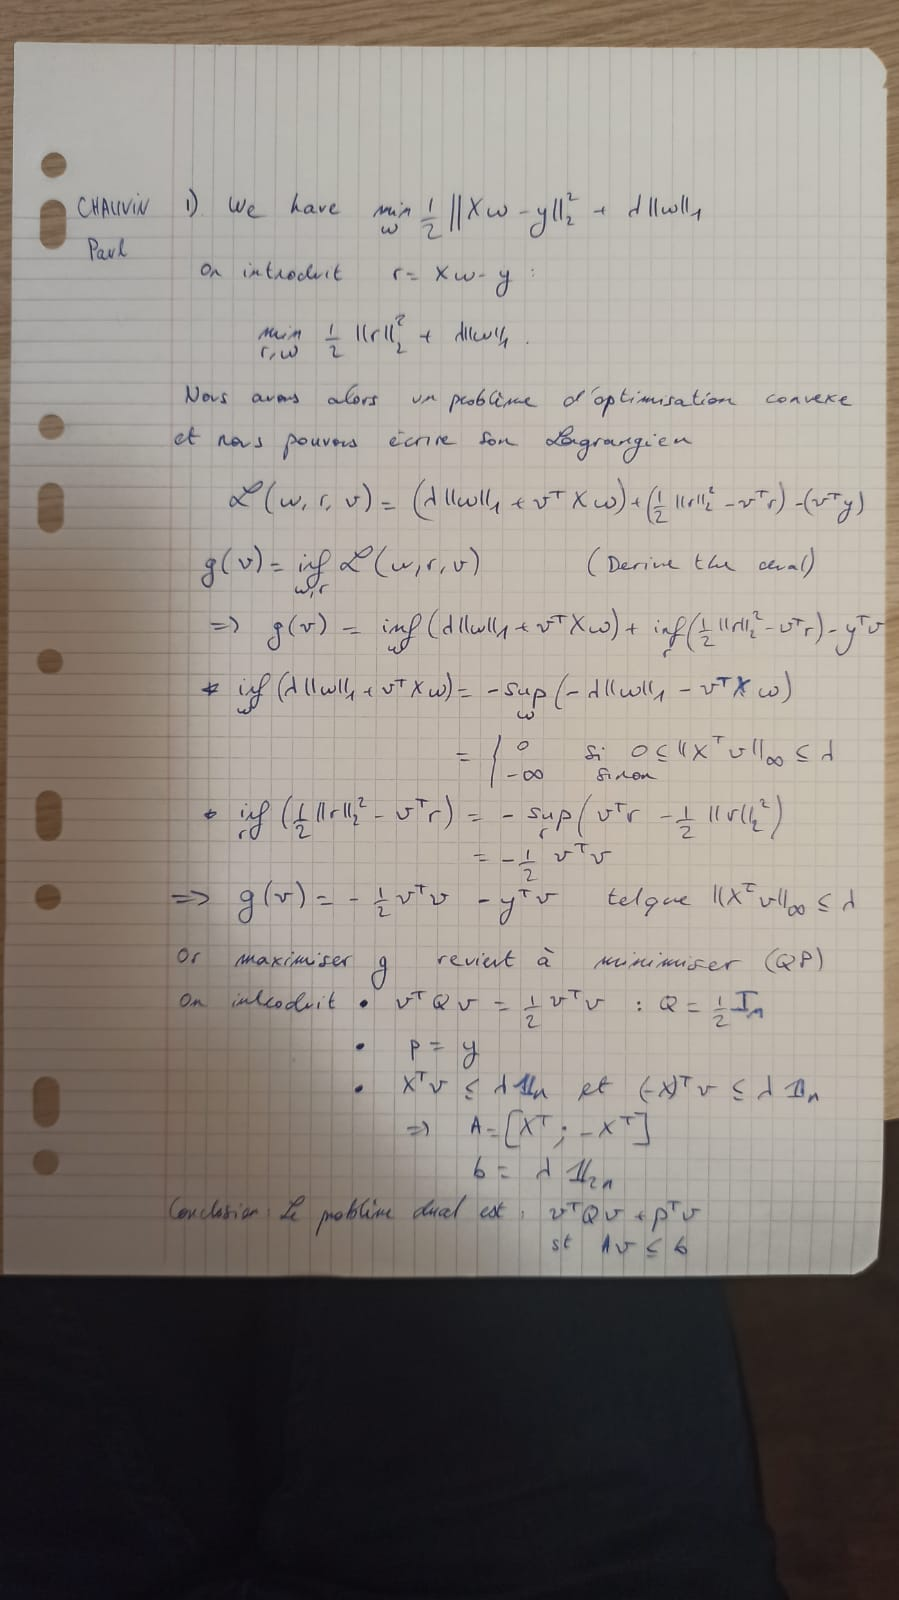

#Part 2: Implement the barrier method to solve QP

##Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Parameters

In [2]:
alpha = 0.1
beta = 0.7
mu = 5
n = 20
d = 15
eps = 10e-6
lambd = 10

##Useful functions

In [3]:
def function(v, Q, p, t0):
    return t0*(np.dot(v.T, np.dot(Q, v)) + np.dot(p.T, v)) - sum([np.log(b[i]-np.dot(A[i], v)) for i in range(b.shape[0])])

In [4]:
def function_true(v, Q, p):
    return np.dot(v.T, np.dot(Q, v)) + np.dot(p.T, v)

In [5]:
def line_search(Q, p, v, t, df, dx, t0):
    if function(v + t*dx, Q, p, t0) <= (function(v, Q, p, t0) + alpha*t*np.dot(df.T, dx)) or ((b-A.dot(v+t*dx))>0).all(): #Avoid infinity log
        return v + t*dx
    else:
        return line_search(Q, p, v, beta*t, df, dx, t0)

##Barrier method

In [6]:
def centering_step(Q, p, A, b, t, v0, eps, numb_iter=0):
    df = t*(2*np.dot(Q, v0) + p) + \
        sum([A[i, np.newaxis].T/(b[i]-np.dot(A[i], v0)) for i in range(b.shape[0])])
    d2f = 2*t*Q + \
        sum([(np.outer(A[i, np.newaxis].T, A[i, np.newaxis].T)) / ((b[i] - np.dot(A[i], v0))**2) for i in range(b.shape[0])])
    dx = -1*np.dot(np.linalg.inv(d2f), df)
    l2 = np.dot(df.T, np.dot(np.linalg.inv(d2f), df))
    if l2/2 <= eps:
        return v0, numb_iter
    v1 = line_search(Q, p, v0, t=1, df=df, dx=dx, t0=t)
    return centering_step(Q, p, A, b, t, v1, eps, numb_iter+1)


In [7]:
def barr_method_inter(Q, p, A, b, v0, eps, t, mu, numb_iter=0, numb_newton = [], v_seq = [], f_seq_true= []):
    v_center, numb_iter_inter = centering_step(Q, p, A, b, t, v0, eps)
    numb_newton.append(numb_iter)
    v_seq.append(v_center)
    f_seq_true.append(function_true(v_center, Q, p)[0][0])
    if b.shape[0]/t < eps:
        return v_center, numb_newton, v_seq, f_seq_true
    else:
        t = mu*t
        return barr_method_inter(Q, p, A, b, v0, eps, t, mu, numb_iter+numb_iter_inter, numb_newton, v_seq, f_seq_true)

In [8]:
def barr_method(Q, p, A, b, v0, eps, mu):
    numb_newton = [0]
    v_seq = [v0]
    f_seq_true = [function_true(v0, Q, p)[0][0]]
    return barr_method_inter(Q, p, A, b, v0, eps, 1, mu, 0, numb_newton, v_seq, f_seq_true)

# Part 3: Test our functions


##Initialization

In [9]:
X = np.random.rand(n,d)
y = np.random.rand(n,1)
Q = 0.5*np.eye(n)
p = -y
A = np.vstack((X.T,-X.T))
b = lambd*np.ones((2*d,1))

v0 = np.zeros((n,1))

mu_list = [2, 5, 10, 15, 20, 25, 30, 40, 50, 70, 85, 100, 130, 170, 200, 250]
mu_list_restricted = [2, 5, 15, 50, 100, 200]
w_center_list = []
f_true_list = []

##Plot results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the futur

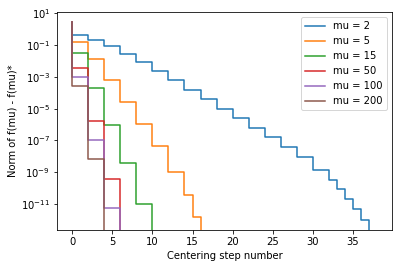

In [10]:
plt.figure()
for mu in mu_list:
    v_center, numb_newton, v_seq, f_seq_true = barr_method(Q, p, A, b, v0, eps, mu)
    w_center = np.linalg.lstsq(X,-v_center-y)[0]
    w_center_list.append(w_center)
    f_true_list.append(f_seq_true[-1])
    if mu in mu_list_restricted:
        plt.step(numb_newton, f_seq_true - f_seq_true[-1], label='mu = '+str(mu))
plt.legend()
plt.ylabel("Norm of f(mu) - f(mu)*")
plt.xlabel("Centering step number")
plt.semilogy()
plt.show()

##Plot W in function of mu

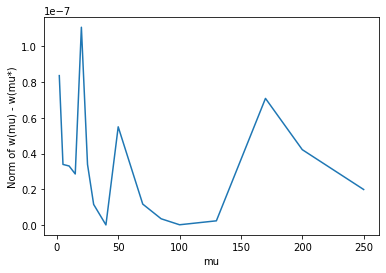

In [11]:
mu_min = np.argmin(f_true_list)
plt.figure()
w_diff_norm = [np.linalg.norm(w-w_center_list[mu_min]) for w in w_center_list]
plt.plot(mu_list, w_diff_norm)
plt.ylabel("Norm of w(mu) - w(mu*)")
plt.xlabel("mu")
plt.show()

In [ ]:
mu_min = np.argmin(f_true_list)
plt.figure()
w_diff_norm = [np.linalg.norm(w-w_center_list[mu_min]) for w in w_center_list]
plt.plot(mu_list, w_diff_norm)
plt.ylabel("Norm of w(mu) - w(mu*)")
plt.xlabel("mu")
plt.show()

When mu is too small, we need to many iterations to converge. Whereas with smaller mu, it's faster, we need less iteerations, however, each step is going to be more costly. An apporpriate value of mu would be around 40. 